In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
n=100;p=40
density = 0.2
X = np.random.normal(0,1,size=(n,p))
idxs = np.random.choice(p, int(density*p), replace=False)
beta_true = np.random.randn(p)
for idx in idxs:
    beta_true[idx] = 0

Y = X @ beta_true + np.random.normal(0,1,n)
Y[Y>=0] = 1
Y[Y<0] = 0
Y = Y.reshape(n,1)

In [3]:
idxs

array([ 0, 35,  5,  4, 38, 17, 20, 29])

In [4]:
X_test = np.random.normal(0,1,size=(n,p))
Y_test = X_test @ beta_true + np.random.normal(0,1,n)
Y_test[Y_test >= 0] = 1
Y_test[Y_test < 0] = 0
Y_test = Y_test.reshape(100,1)

In [5]:
beta = cp.Variable((p,1))
lambd = cp.Parameter(nonneg = True)

In [6]:
error = cp.sum(cp.multiply(Y, X@beta) - 
               cp.reshape(cp.log_sum_exp(cp.hstack([np.zeros((n,1)), X@beta]),axis=1),(n,1)))

In [7]:
l1_pen = cp.norm1(beta)

In [8]:
problem = cp.Problem(cp.Maximize(error - lambd*l1_pen))

In [9]:
problem

Problem(Maximize(Expression(CONCAVE, UNKNOWN, ())), [])

In [16]:
train_error = []
test_error = []
ite = 100
lambd_val = np.logspace(-2,0,ite)
for val in lambd_val:
    lambd.value = val
    problem.solve()
    Y_hat = X @ beta.value
    Y_hat[Y_hat >=0] = 1
    Y_hat[Y_hat < 0] = 0
    train_error.append(np.sum(Y_hat != Y)/n)
    
    Y_test_hat = X_test @ beta.value
    Y_test_hat[Y_test_hat >= 0] = 1
    Y_test_hat[Y_test_hat < 0] = 0
    test_error.append(np.sum(Y_test_hat != Y_test)/n)

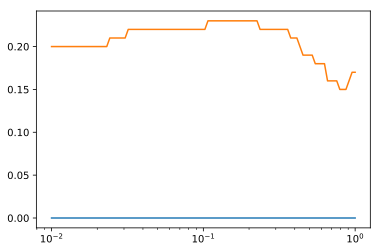

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.plot(lambd_val,train_error)
plt.plot(lambd_val,test_error)
plt.xscale('log')